In [92]:

import xgboost as xgb

import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd


In [ ]:
df = pd.read_csv("dataset.csv")

In [94]:

df['Outcome'] = df['Outcome'].replace({'Cluster_1': 0, 'Cluster_2': 1})

C:\Users\0945\AppData\Local\Temp\ipykernel_10908\752984198.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Outcome'] = df['Outcome'].replace({'Cluster_1': 0, 'Cluster_2': 1})


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Medication          300 non-null    int64 
 1   Age                 300 non-null    int64 
 2   Gender              300 non-null    object
 3   BMI                 300 non-null    int64 
 4   SurgeryType         300 non-null    object
 5   SurgeryDuration     300 non-null    object
 6   AnesthesiaType      300 non-null    object
 7   PreoperativeNotes   300 non-null    object
 8   PostoperativeNotes  300 non-null    object
 9   PainLevel           300 non-null    int64 
 10  Complications       227 non-null    object
 11  Outcome             300 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 28.2+ KB


In [96]:
df.head()

,Medication,Age,Gender,BMI,SurgeryType,SurgeryDuration,AnesthesiaType,PreoperativeNotes,PostoperativeNotes,PainLevel,Complications,Outcome
0,204,58,M,30,Cardiovascular,179 min,General,"Stable, no allergies","Minimal pain, no complications",3,Delayed recovery,1
1,267,58,M,23,Cardiovascular,117 min,General,"Stable, no allergies","Pain, slow recovery",7,Delayed recovery,1
2,153,72,M,28,Cardiovascular,169 min,Local,"Stable, no allergies","Pain, slow recovery",6,NaN,1
3,10,58,M,28,Cosmetic,207 min,General,"Stable, no allergies","Minimal pain, no complications",6,Respiratory distress,0
4,234,58,M,23,Orthopedic,94 min,General,"Stable, no allergies","Minimal pain, no complications",4,"Nausea, mild bleeding",1


In [97]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

In [98]:
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(df[column].value_counts())
    print("\n")

Value counts for Gender:
Gender
M    155
F    145
Name: count, dtype: int64


Value counts for SurgeryType:
SurgeryType
Cosmetic          80
Orthopedic        78
Cardiovascular    76
Neurological      66
Name: count, dtype: int64


Value counts for SurgeryDuration:
SurgeryDuration
105 min    5
181 min    5
169 min    5
187 min    5
192 min    4
          ..
236 min    1
146 min    1
161 min    1
64 min     1
77 min     1
Name: count, Length: 139, dtype: int64


Value counts for AnesthesiaType:
AnesthesiaType
Local      151
General    149
Name: count, dtype: int64


Value counts for PreoperativeNotes:
PreoperativeNotes
Hypertension, diabetes    157
Stable, no allergies      143
Name: count, dtype: int64


Value counts for PostoperativeNotes:
PostoperativeNotes
Minimal pain, no complications    152
Pain, slow recovery               148
Name: count, dtype: int64


Value counts for Complications:
Complications
Respiratory distress     83
Nausea, mild bleeding    80
Delayed recovery        

In [99]:
# Assuming your column is called 'SurgeryDuration'
df['SurgeryDuration'] = df['SurgeryDuration'].str.extract('(\d+)').astype(float)

In [100]:
df['Complications'] = df['Complications'].fillna(df['Complications'].mode()[0])

In [101]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])



In [102]:
X = df.drop("Outcome",axis = 1)
y = df["Outcome"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy of XGBoost: 0.9833333333333333
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.97      0.99        35

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



c:\Users\0945\.conda\envs\env\lib\site-packages\xgboost\core.py:158: UserWarning: [13:19:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


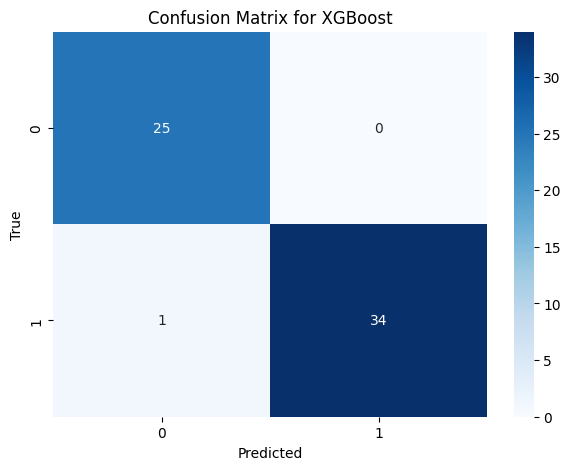

In [104]:
scaler = StandardScaler()  # You can switch to StandardScaler if needed

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler (using only transform, not fit)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame for easier use
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data
y_pred_xgb = xgb_model.predict(X_test_scaled)  # Predict on the scaled test data

# Accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy of XGBoost: {accuracy_xgb}')

# Classification Report
print("Classification Report for XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix heatmap
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for XGBoost")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy of Random Forest: 0.9833333333333333
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.97      0.99        35

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



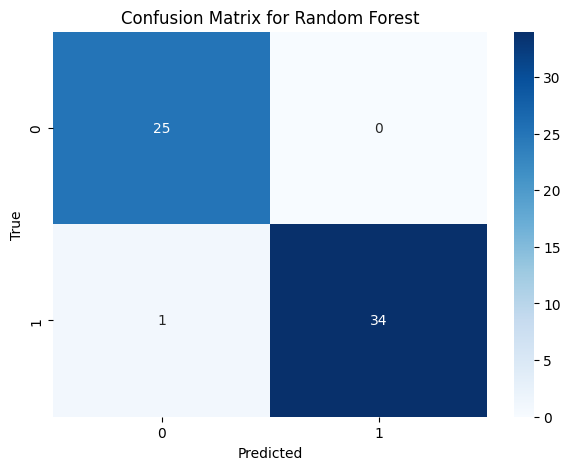

In [105]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data
y_pred_rf = rf_model.predict(X_test_scaled)  # Predict on the scaled test data

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy of Random Forest: {accuracy_rf}')

# Classification Report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for Random Forest")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Accuracy of SVM: 0.9333333333333333
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        25
           1       0.94      0.94      0.94        35

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



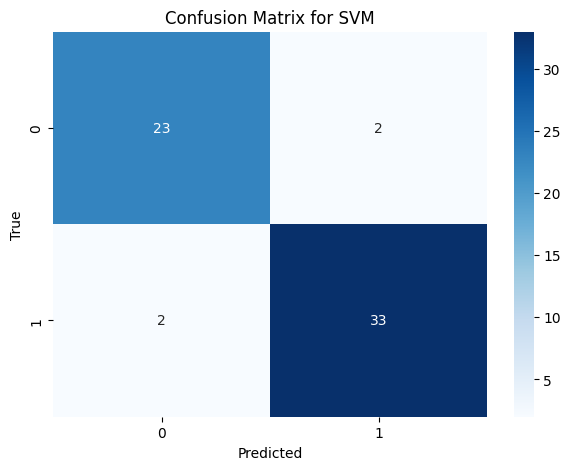

In [106]:
# Support Vector Machine Classifier (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)  # Fit the model on the scaled training data
y_pred_svm = svm_model.predict(X_test_scaled)  # Predict on the scaled test data

# Accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy of SVM: {accuracy_svm}')

# Classification Report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix heatmap
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix for SVM")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
